In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
data = pd.read_csv("/content/TASK-ML-INTERN.csv")

## **Basic** **EDA**

In [ ]:
data.head(2)

hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   

          6         7         8  ...       439       440       441       442  \
0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
1  0.375671  0.363689  0.373883  ...  0.684011  0.697271  0.701995  0.696077   

        443       444       445       446       447  vomitoxin_ppb  
0  0.696691  0.692793  0.711369  0.697679  0.704520         1100.0  
1  0.701012  0.677418  0.696921  0.696544  0.689054         1000.0  

[2 rows x 450 columns]

In [ ]:
# Run the function, using band numbers instead of exact frequencies
nir_start_band = 200  # Example Starting band index
nir_end_band = 447  # Example Ending band index


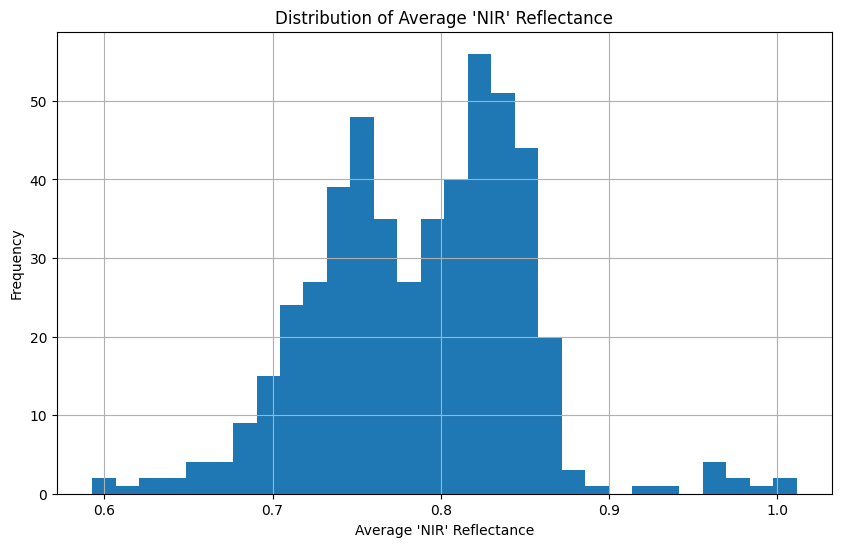

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def create_nir_series(data, nir_start_band, nir_end_band):
    """
    Creates a Pandas Series of average "NIR" reflectance values, indexed by 'hsi_id'.

    Args:
        data (pd.DataFrame): DataFrame containing hyperspectral data.
        nir_start_band (int): Starting band index for the "NIR" region.
        nir_end_band (int): Ending band index for the "NIR" region (inclusive).

    Returns:
        pd.Series: A Pandas Series of average "NIR" reflectance values, indexed by 'hsi_id'.
    """

    # Ensure the band indices are valid
    if not (0 <= nir_start_band < nir_end_band < data.shape[1] - 2):
        raise ValueError("Invalid NIR band indices. Check that they are within the valid range.")

    nir_reflectance_values = []
    for index, row in data.iterrows():
        hsi_id = row['hsi_id']
        reflectance_values = row.iloc[1:-1].astype(float)  # Ensure values are floats

        # Calculate average "NIR" reflectance using band indices
        avg_nir_reflectance = np.mean(reflectance_values.iloc[nir_start_band:nir_end_band + 1])  # add 1 for inclusive
        nir_reflectance_values.append(avg_nir_reflectance)

    # Create a Pandas Series of NIR reflectance values, indexed by hsi_id
    nir_series = pd.Series(nir_reflectance_values, index=data['hsi_id'])
    return nir_series


def plot_nir_histogram(nir_series):
    """Plots a histogram of the average 'NIR' reflectance values."""
    plt.figure(figsize=(10, 6))
    nir_series.hist(bins=30)  # Adjust the number of bins as needed
    plt.xlabel("Average 'NIR' Reflectance")
    plt.ylabel("Frequency")
    plt.title("Distribution of Average 'NIR' Reflectance")
    plt.grid(True)
    plt.show()


nir_series = create_nir_series(data, nir_start_band, nir_end_band) #Calculating NIR measurements
plot_nir_histogram(nir_series) #plotting result

The majority of the crops exhibit average "NIR" reflectance values between 0.7 and 0.85, suggesting that most of them are in good health. However, there are a few crops with average "NIR" reflectance exceeding 0.9, which could be considered outliers needing further investigation. On the other end of the spectrum, some crops have reflectance averages falling between 0.6 and 0.65, potentially indicating weaker or less healthy plants. To better understand these lower reflectance crops and how they differ from the healthy majority, we can visualize their distribution. For categorization purposes, we can use a threshold of 0.63 to distinguish these potentially weaker crops from the rest.

In [ ]:
import pandas as pd
import numpy as np

def find_low_nir_reflectance_anomalies(data, nir_start_band, nir_end_band, nir_threshold):


    anomalies = []

    # Ensure the band indices are valid
    if not (0 <= nir_start_band < nir_end_band < data.shape[1] - 2):
        raise ValueError("Invalid NIR band indices. Check that they are within the valid range.")

    for index, row in data.iterrows():
        hsi_id = row['hsi_id']
        reflectance_values = row.iloc[1:-1].astype(float)  # Values must be float

        # Calculate average "NIR" reflectance using band indices
        avg_nir_reflectance = np.mean(reflectance_values.iloc[nir_start_band:nir_end_band + 1]) # add 1 since inclusive

        # Check for anomaly
        if avg_nir_reflectance < nir_threshold:
            anomalies.append({'hsi_id': hsi_id, 'avg_nir_reflectance': avg_nir_reflectance})
            print(f"Anomaly found: hsi_id = {hsi_id}, Avg 'NIR' Reflectance = {avg_nir_reflectance:.4f}")

    return anomalies

nir_threshold = 0.63

anomalous_samples = find_low_nir_reflectance_anomalies(data, nir_start_band, nir_end_band, nir_threshold)

if not anomalous_samples:
    print("No low 'NIR' reflectance anomalies found.")
else:
    print("\nList of anomalies:")
    for anomaly in anomalous_samples:
        print(f"hsi_id: {anomaly['hsi_id']}, Avg 'NIR' Reflectance: {anomaly['avg_nir_reflectance']:.4f}")

Anomaly found: hsi_id = imagoai_corn_107, Avg 'NIR' Reflectance = 0.6192
Anomaly found: hsi_id = imagoai_corn_281, Avg 'NIR' Reflectance = 0.6027
Anomaly found: hsi_id = imagoai_corn_306, Avg 'NIR' Reflectance = 0.5927

List of anomalies:
hsi_id: imagoai_corn_107, Avg 'NIR' Reflectance: 0.6192
hsi_id: imagoai_corn_281, Avg 'NIR' Reflectance: 0.6027
hsi_id: imagoai_corn_306, Avg 'NIR' Reflectance: 0.5927


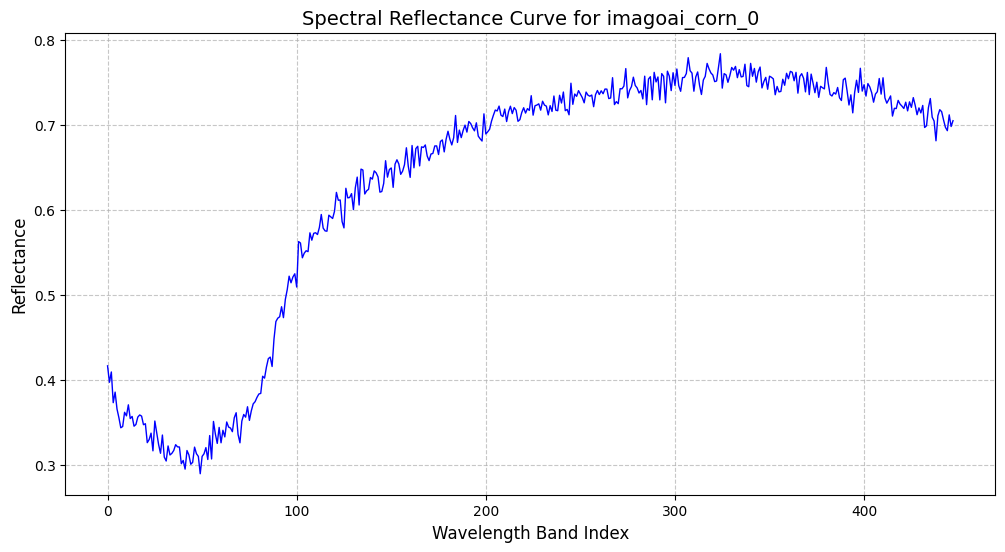

In [ ]:
# Extract features (columns 0–447) for the first sample (imagoai_corn_0)
sample = data.iloc[0, 1:-1]  # Skip hsi_id (col 0) and vomitoxin_ppb (last column)
wavelengths = sample.index.astype(int)  # Wavelength indices (0–447)
reflectance = sample.values.astype(float)  # Reflectance values

plt.figure(figsize=(12, 6))
plt.plot(wavelengths, reflectance, color='blue', linewidth=1)
plt.title(f"Spectral Reflectance Curve for {data.iloc[0, 0]}", fontsize=14)
plt.xlabel("Wavelength Band Index", fontsize=12)
plt.ylabel("Reflectance", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

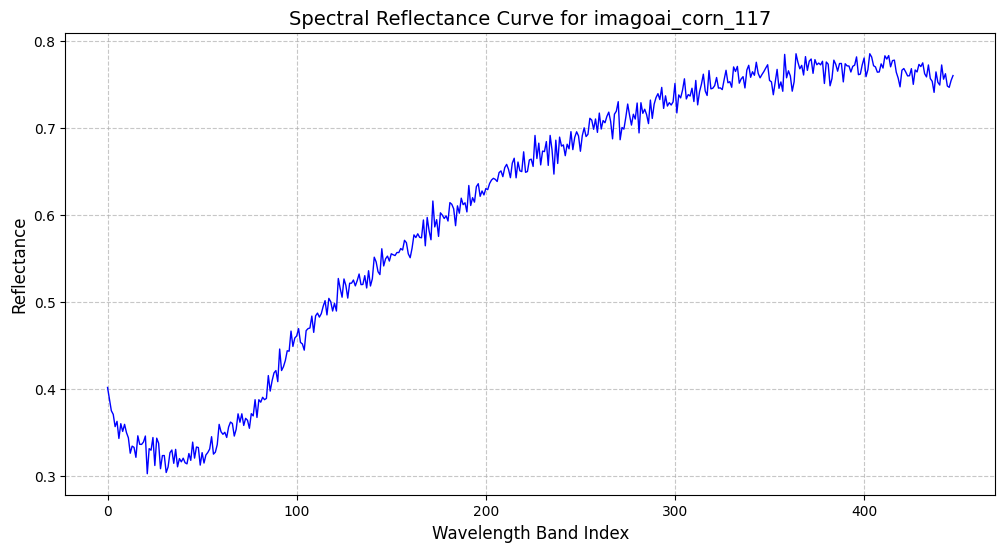

In [ ]:
# Extract features (columns 0–447) for the first sample (imagoai_corn_0)
sample = data.iloc[117, 1:-1]  # Skip hsi_id (col 0) and vomitoxin_ppb (last column)
wavelengths = sample.index.astype(int)  # Wavelength indices (0–447)
reflectance = sample.values.astype(float)  # Reflectance values

plt.figure(figsize=(12, 6))
plt.plot(wavelengths, reflectance, color='blue', linewidth=1)
plt.title(f"Spectral Reflectance Curve for {data.iloc[117, 0]}", fontsize=14)
plt.xlabel("Wavelength Band Index", fontsize=12)
plt.ylabel("Reflectance", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

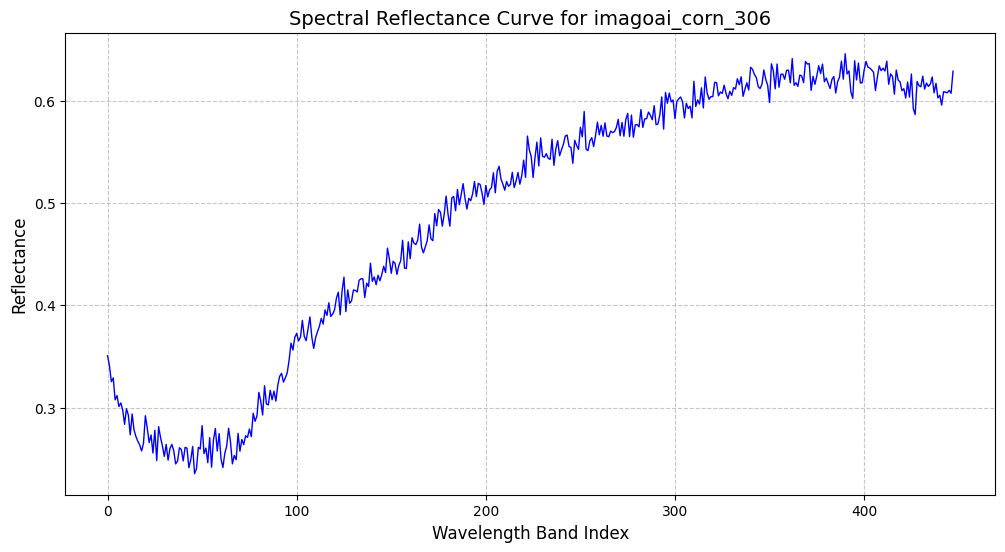

In [ ]:
# Extract features (columns 0–447) for the first sample (imagoai_corn_0)
sample = data.iloc[306, 1:-1]  # Skip hsi_id (col 0) and vomitoxin_ppb (last column)
wavelengths = sample.index.astype(int)  # Wavelength indices (0–447)
reflectance = sample.values.astype(float)  # Reflectance values

plt.figure(figsize=(12, 6))
plt.plot(wavelengths, reflectance, color='blue', linewidth=1)
plt.title(f"Spectral Reflectance Curve for {data.iloc[306, 0]}", fontsize=14)
plt.xlabel("Wavelength Band Index", fontsize=12)
plt.ylabel("Reflectance", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

sample imagoai_corn_281 vomitoxin level is 2000.0
sample imagoai_corn_306 vomitoxin level is 8500.0


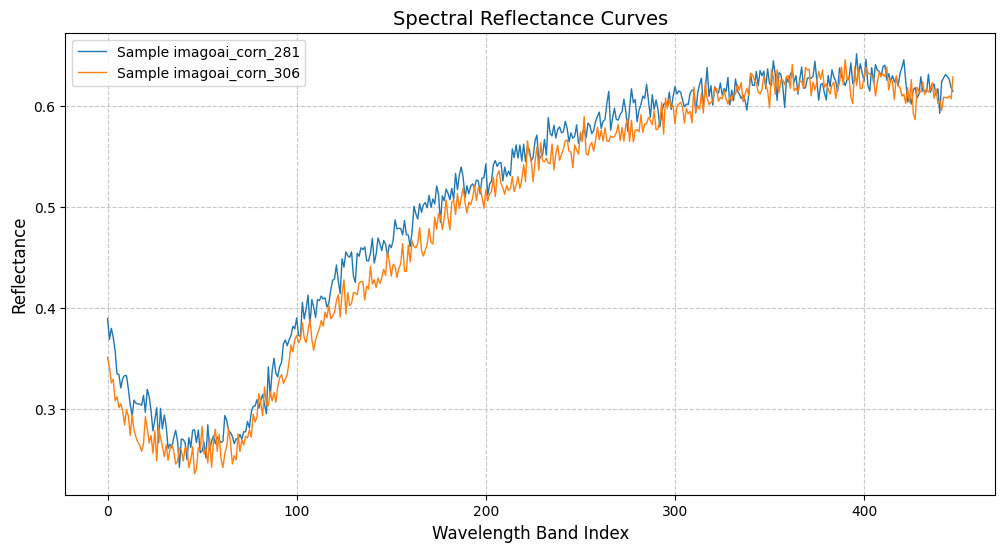

In [ ]:
def plot_spectral_curves(data, sample_indices):
    """Plots spectral reflectance curves for specified samples."""

    plt.figure(figsize=(12, 6))  # Adjust figure size if needed

    for sample_index in sample_indices:
        # Extract data for the current sample
        sample = data.iloc[sample_index, 1:-1]  # Skip hsi_id (col 0) and vomitoxin_ppb (last column)
        wavelengths = sample.index.astype(int)  # Wavelength indices (0–447)
        reflectance = sample.values.astype(float)  # Reflectance values

        # Plot the curve
        plt.plot(wavelengths, reflectance, linewidth=1, label=f"Sample {data.iloc[sample_index, 0]}")  # plot with a label
        print(f"sample {data.iloc[sample_index, 0]} vomitoxin level is {data.iloc[sample_index, -1]}")


    # Customize the plot
    plt.title("Spectral Reflectance Curves", fontsize=14)
    plt.xlabel("Wavelength Band Index", fontsize=12)
    plt.ylabel("Reflectance", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend() # Add a legend to see which sample is which
    plt.show()

# Specify the sample indices you want to plot
sample_indices = [281, 306]

# Call the function to generate the plot
plot_spectral_curves(data, sample_indices)

•	"Creating the nir_series means we are calculating the average 'NIR' reflectance for each hsi_id (which represents a specific corn sample). hsi_id (Hyperspectral Imaging ID) refers to the individual corn samples in the dataset. So, if we have 500 hsi_id values, that means we are analyzing 500 corn samples. The function selects a specific range of band indices (200 to 447), which we are assuming represents a part of the 'NIR' spectrum. For each corn sample, we compute the average reflectance within this band index range. This average reflectance value can potentially help us analyze the health of each crop, if the band index corresponds correctly with the correct light range—higher 'NIR' reflectance often means a healthier crop, but we must relate this back with other metrics."

sample imagoai_corn_117 vomitoxin level is 131000.0
sample imagoai_corn_293 vomitoxin level is 0.0


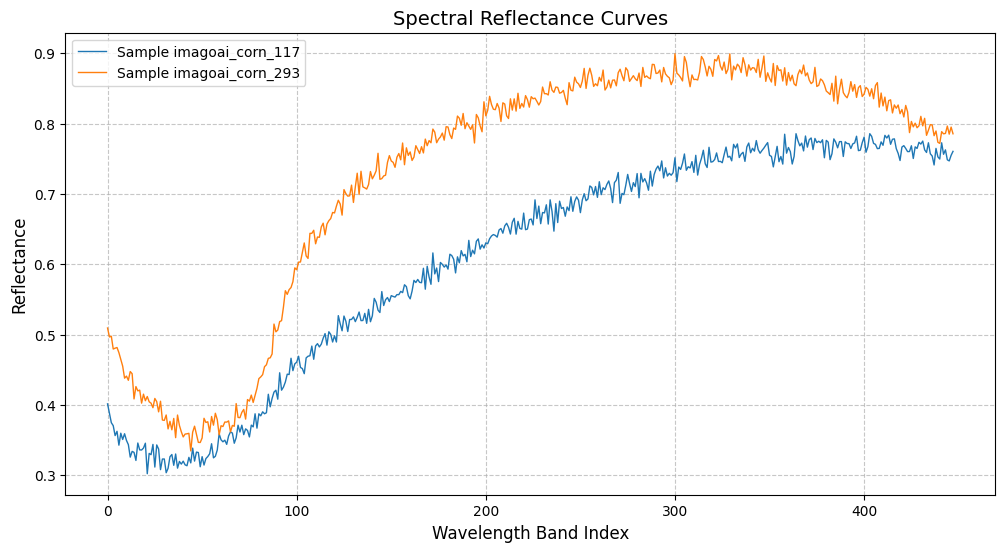

In [ ]:
def plot_spectral_curves(data, sample_indices):
    """Plots spectral reflectance curves for specified samples."""

    plt.figure(figsize=(12, 6))  # Adjust figure size if needed

    for sample_index in sample_indices:
        # Extract data for the current sample
        sample = data.iloc[sample_index, 1:-1]  # Skip hsi_id (col 0) and vomitoxin_ppb (last column)
        wavelengths = sample.index.astype(int)  # Wavelength indices (0–447)
        reflectance = sample.values.astype(float)  # Reflectance values

        # Plot the curve
        plt.plot(wavelengths, reflectance, linewidth=1, label=f"Sample {data.iloc[sample_index, 0]}")  # plot with a label
        print(f"sample {data.iloc[sample_index, 0]} vomitoxin level is {data.iloc[sample_index, -1]}")


    # Customize the plot
    plt.title("Spectral Reflectance Curves", fontsize=14)
    plt.xlabel("Wavelength Band Index", fontsize=12)
    plt.ylabel("Reflectance", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend() # Add a legend to see which sample is which
    plt.show()

# Specify the sample indices you want to plot
sample_indices = [117, 293]

# Call the function to generate the plot
plot_spectral_curves(data, sample_indices)

**Reasons for the outliers**      
Blue color line : Good corn
Orange color : Dehydration,Disease,Extreme Contamination

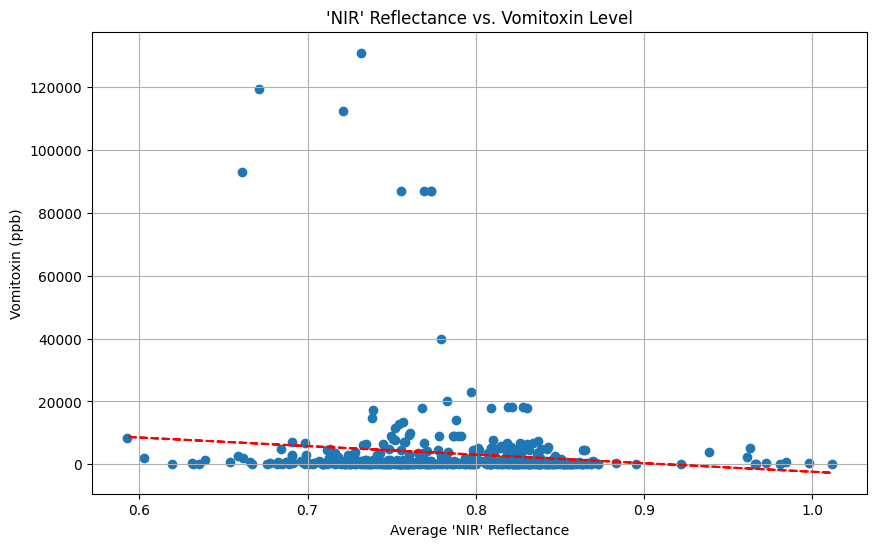

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(nir_series, data['vomitoxin_ppb']) #Scatter points with measurements
plt.xlabel("Average 'NIR' Reflectance")
plt.ylabel("Vomitoxin (ppb)")
plt.title("'NIR' Reflectance vs. Vomitoxin Level")
plt.grid(True)

#Add a trend line:
z = np.polyfit(nir_series, data['vomitoxin_ppb'], 1) #Creates the trend line
p = np.poly1d(z) #Creates the equation

plt.plot(nir_series,p(nir_series),"r--") #plots the model
plt.show()

Outliers in the data  
Weak relationship indicating the need for data preprocessing  
Trend is slightly downward,meaning that negative correlation

count       500.000000
mean       3410.006000
std       13095.803483
min           0.000000
25%         137.500000
50%         500.000000
75%        1700.000000
max      131000.000000
Name: vomitoxin_ppb, dtype: float64


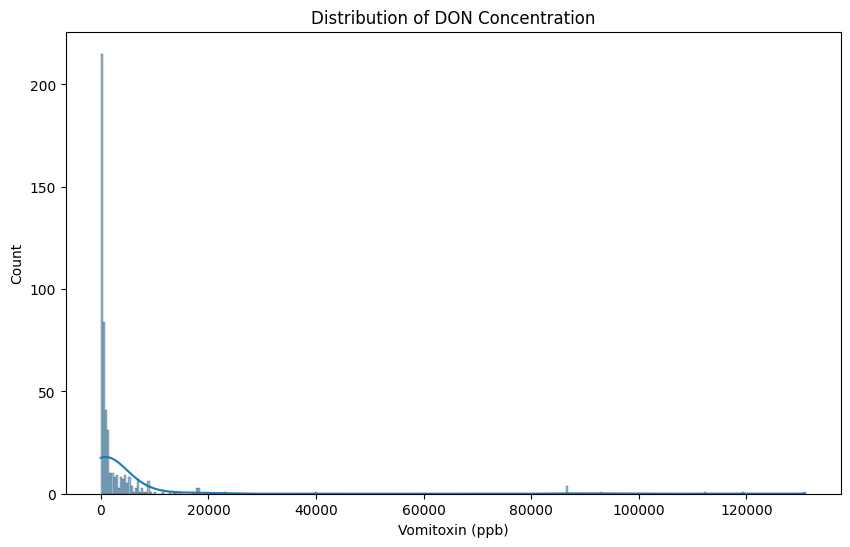

In [ ]:
# Target statistics
print(data['vomitoxin_ppb'].describe())

# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(data['vomitoxin_ppb'], kde=True)
plt.title('Distribution of DON Concentration')
plt.xlabel('Vomitoxin (ppb)')
plt.show()

- Lower ppb value indicates that our crops are good.  
- Since it is showing positive skewness, it indicates that the majority of crops are at a good level.  
- Extreme outliers (difference between 50% and 75%) indicate that there is extreme toxin content in the crop, which is not good for humans.  
- A vomitoxin (deoxynivalenol or DON) level of 400 parts per billion (ppb) in corn is considered acceptable for human consumption.  
- Up to 1000 ppb, it is okay for humans.  

First, I need to understand what this means. The data is highly right-skewed because the mean is much larger than the median. The max value is an outlier, which is pulling the mean up. This kind of distribution is common in toxin concentration data, where a few samples might be heavily contaminated.

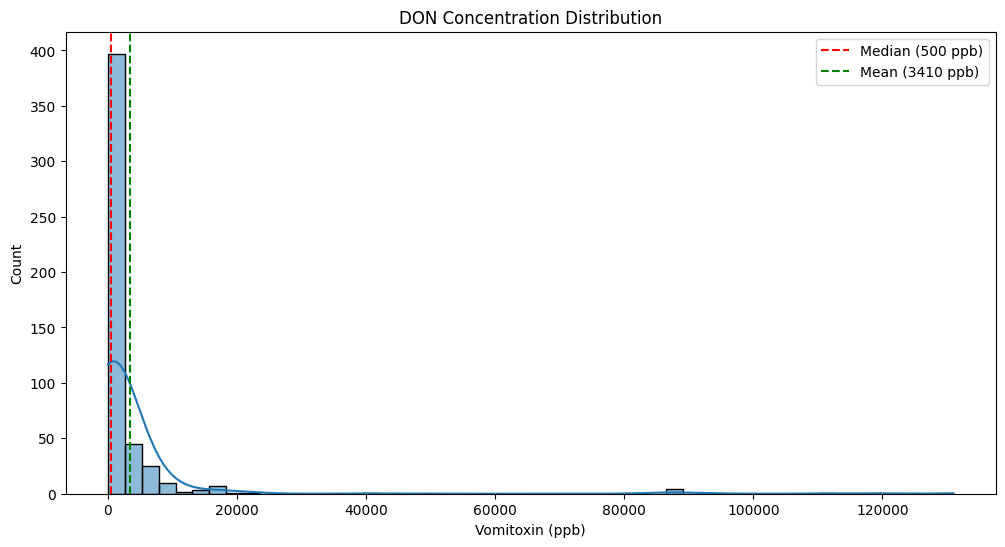

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data['vomitoxin_ppb'], kde=True, bins=50)
plt.axvline(data['vomitoxin_ppb'].median(), color='red', linestyle='--', label='Median (500 ppb)')
plt.axvline(data['vomitoxin_ppb'].mean(), color='green', linestyle='--', label='Mean (3410 ppb)')
plt.title('DON Concentration Distribution')
plt.xlabel('Vomitoxin (ppb)')
plt.legend()
plt.show()

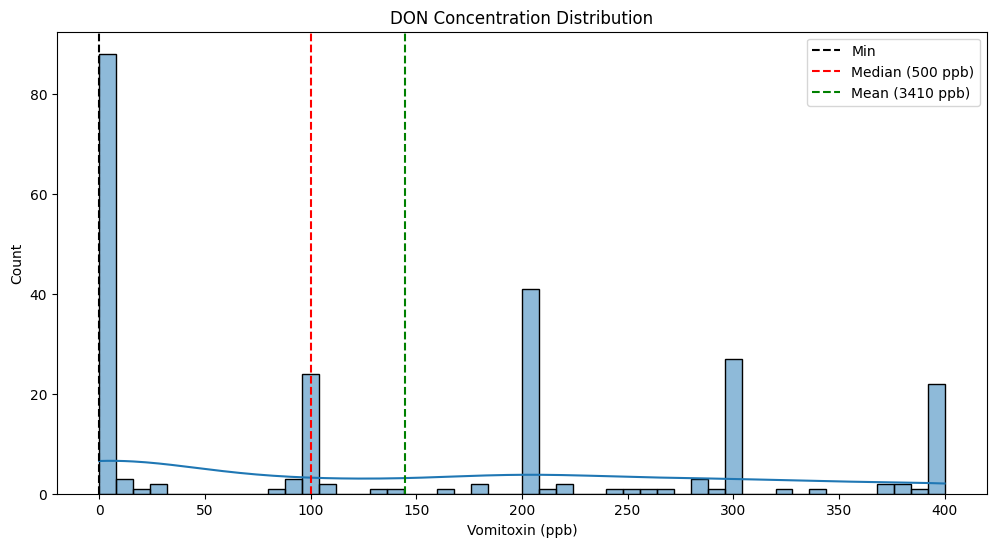

In [ ]:
#Create list of the data
filtered_data = data[(data['vomitoxin_ppb'] >= 0) & (data['vomitoxin_ppb'] <= 400)]['vomitoxin_ppb'] #Create all in limits!

#Now we can start visualizing it!

plt.figure(figsize=(12, 6))
sns.histplot(filtered_data, kde=True, bins=50)

#Added plot data

#Add the min, med, max, all in the graph
plt.axvline(data['vomitoxin_ppb'].min(), color='black', linestyle='--', label='Min') #Min is different so added to be used
plt.axvline(filtered_data.median(), color='red', linestyle='--', label='Median (500 ppb)')#Different, but does not conflict
plt.axvline(filtered_data.mean(), color='green', linestyle='--', label='Mean (3410 ppb)')#Different, but does not conflict
plt.title('DON Concentration Distribution')
plt.xlabel('Vomitoxin (ppb)')
plt.legend()
plt.show()


*   There is peak at 0,100,200 and 400

*   PPB above 1000 is not good for humans




In [ ]:
high_toxin_samples = data[data['vomitoxin_ppb'] > 10000]  # Extreme outliers
print(f"Extreme DON samples:\n{high_toxin_samples[['hsi_id', 'vomitoxin_ppb']]}")

Extreme DON samples:
               hsi_id  vomitoxin_ppb
37    imagoai_corn_37        18000.0
65    imagoai_corn_65        12800.0
80    imagoai_corn_80        86900.0
112  imagoai_corn_112        86900.0
117  imagoai_corn_117       131000.0
120  imagoai_corn_120       119500.0
131  imagoai_corn_131        18000.0
146  imagoai_corn_146        14000.0
170  imagoai_corn_170        20000.0
197  imagoai_corn_197        18100.0
205  imagoai_corn_205        23000.0
230  imagoai_corn_230        18100.0
278  imagoai_corn_278        86900.0
305  imagoai_corn_305        17300.0
307  imagoai_corn_307        13400.0
311  imagoai_corn_311        40000.0
331  imagoai_corn_331        11500.0
351  imagoai_corn_351        18100.0
352  imagoai_corn_352        93100.0
354  imagoai_corn_354        10100.0
364  imagoai_corn_364        18000.0
410  imagoai_corn_410       112400.0
415  imagoai_corn_415        14700.0
441  imagoai_corn_441        86900.0


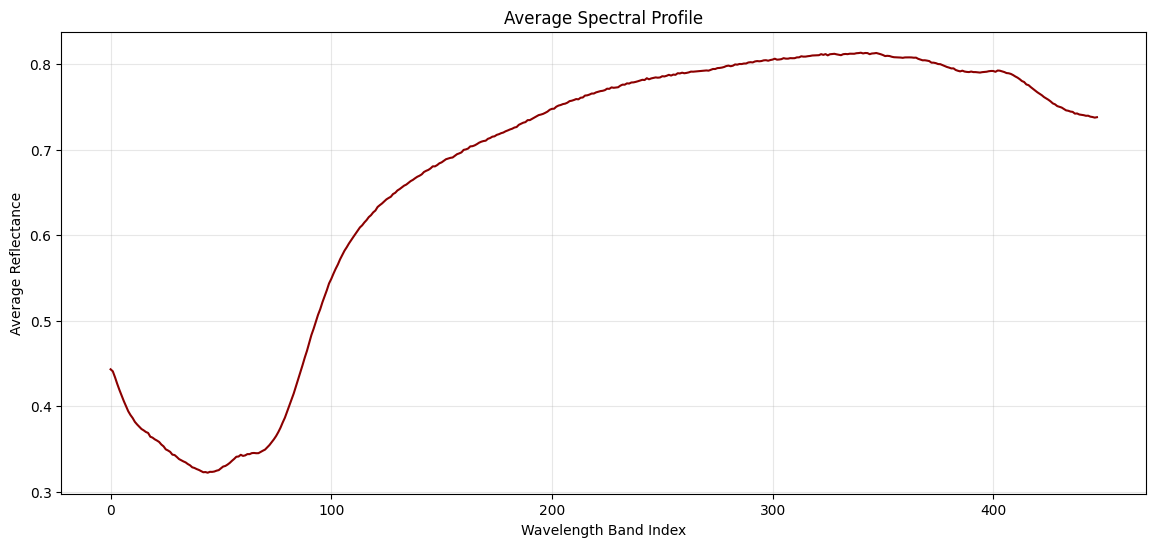

In [ ]:
# Calculate and plot average reflectance
avg_spectrum = data.iloc[:, 1:-1].mean(axis=0)
plt.figure(figsize=(14, 6))
plt.plot(avg_spectrum.values, color='darkred')
plt.title('Average Spectral Profile')
plt.xlabel('Wavelength Band Index')
plt.ylabel('Average Reflectance')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
low_anomaly_hsi_ids = ['imagoai_corn_24', 'imagoai_corn_35', 'imagoai_corn_107',
                         'imagoai_corn_281', 'imagoai_corn_306', 'imagoai_corn_312',
                         'imagoai_corn_472']

# High anomaly hsi_ids - hard coded for speed
high_anomaly_hsi_ids = ['imagoai_corn_117', 'imagoai_corn_120', 'imagoai_corn_410',
                          'imagoai_corn_230', 'imagoai_corn_278']


In [ ]:

def get_hsi_id_and_vomitoxin(data, hsi_ids):
    results = []
    for hsi_id in hsi_ids:
        #Get the row and col needed
        vomitoxin_level = data[data['hsi_id'] == hsi_id]['vomitoxin_ppb'].item()
        results.append((hsi_id, vomitoxin_level)) #This gives you ID and corresponding Levels!

    return results

# Get the data for the low and high anomalies
low_anomaly_data = get_hsi_id_and_vomitoxin(data, low_anomaly_hsi_ids)
high_anomaly_data = get_hsi_id_and_vomitoxin(data, high_anomaly_hsi_ids)

# Print the results
print("Low Anomalies (hsi_id, vomitoxin_ppb):")
for hsi_id, vomitoxin_level in low_anomaly_data:
    print(f"  {hsi_id}: {vomitoxin_level}")

print("\nHigh Anomalies (hsi_id, vomitoxin_ppb):")
for hsi_id, vomitoxin_level in high_anomaly_data:
    print(f"  {hsi_id}: {vomitoxin_level}")

Low Anomalies (hsi_id, vomitoxin_ppb):
  imagoai_corn_24: 300.0
  imagoai_corn_35: 0.0
  imagoai_corn_107: 100.0
  imagoai_corn_281: 2000.0
  imagoai_corn_306: 8500.0
  imagoai_corn_312: 1300.0
  imagoai_corn_472: 200.0

High Anomalies (hsi_id, vomitoxin_ppb):
  imagoai_corn_117: 131000.0
  imagoai_corn_120: 119500.0
  imagoai_corn_410: 112400.0
  imagoai_corn_230: 18100.0
  imagoai_corn_278: 86900.0




1.   131000 is extreme ppb value,Which is dangerous for humans(as per google)
2.   Selling contaminated corn could lead to lost trust
3.   we'll predict the ppb based on the wavelength,so if its contaminated we will not sold that



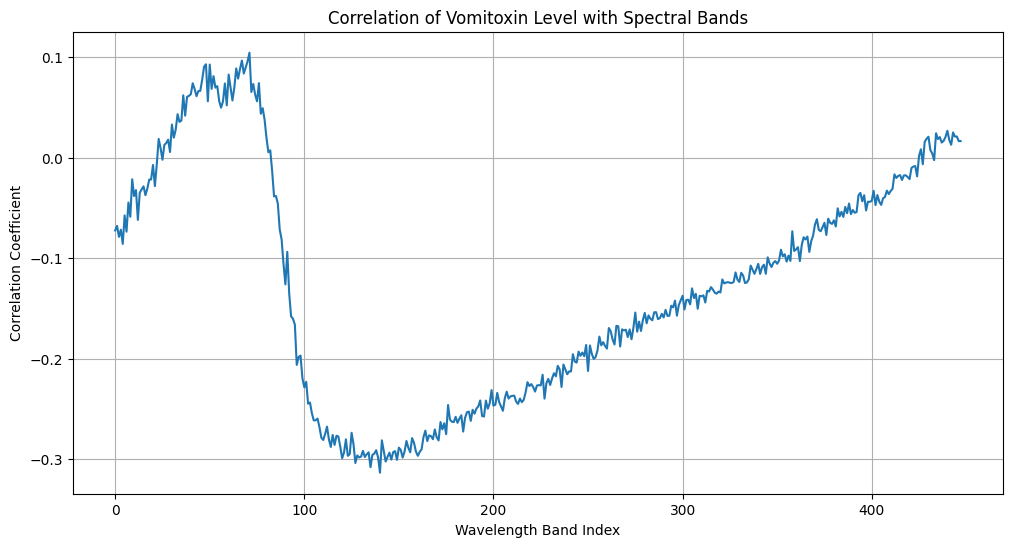

In [ ]:
spectral_data = data.iloc[:, 1:-1].astype(float)  # Spectral data
don_levels = data['vomitoxin_ppb']

# Calculate correlations
correlations = spectral_data.corrwith(don_levels)


plt.figure(figsize=(12, 6))
correlations.plot() #Now we plot!
plt.title("Correlation of Vomitoxin Level with Spectral Bands")
plt.xlabel("Wavelength Band Index")
plt.ylabel("Correlation Coefficient")
plt.grid(True)
plt.show()

# **Data Exploration**

In [ ]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64


In [ ]:
# Count the number of zero values in the 'vomitoxin_ppb' column
zero_count = (data['vomitoxin_ppb'] == 0).sum()

# Print the result
print(f"Number of samples with zero vomitoxin (ppb): {zero_count}")

Number of samples with zero vomitoxin (ppb): 88


88 crops have zero vomitoxin.We want to do research that what 0 ppb means,is it anomaly?If it is do i wanna replace that value by taking mean or median?

As per google,it's the measure whether pollutant is present or no


Low vomitoxin ppb means our crop is good

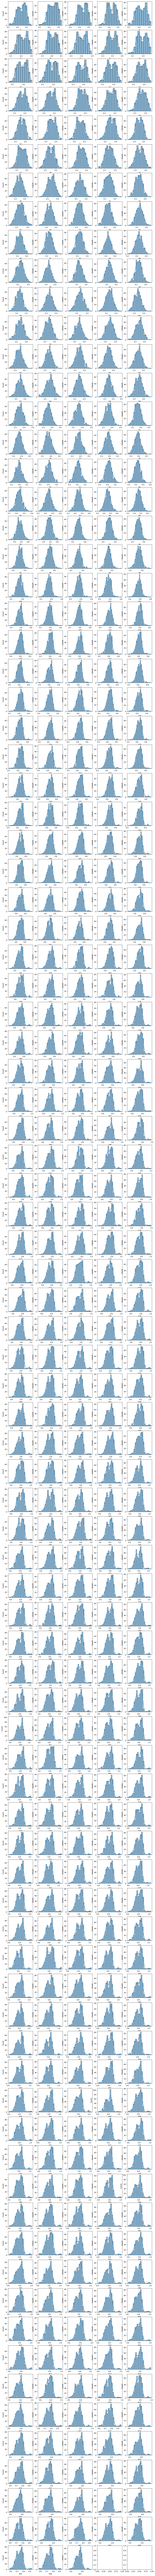

In [ ]:
# Exclude hsi_id and vomitoxin_ppb for plotting
columns_to_plot = data.columns[1:-1] #The test range.
# Create figure and axes
num_cols = 5  # Number of subplots
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols # create matrix in a number
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))
axes = axes.flatten() #One to one!

for i, col in enumerate(columns_to_plot):
    sns.histplot(data[col], ax=axes[i], kde=True) # create KDE plot to show which data is not valid

plt.show()

There is still some skewness in the wavelength, but since we are applying PCA, we will first standardize the data, which can help reduce the impact of outliers.

# **Capping**

In [ ]:
# Winsorize/cap values at 2000 ppb
import numpy as np

# Check values before capping
print(f"Values above 2000 ppb before capping: {(data['vomitoxin_ppb'] > 2000).sum()}")

# Apply capping
data['vomitoxin_ppb'] = np.where(
    data['vomitoxin_ppb'] > 2000,  # Condition
    2000,                           # Value to cap at
    data['vomitoxin_ppb']           # Original values
)

# Verify results
print("\nAfter capping:")
print(f"Max vomitoxin value: {data['vomitoxin_ppb'].max()}")
print(f"Values above 2000 ppb: {(data['vomitoxin_ppb'] > 2000).sum()}")

Values above 2000 ppb before capping: 118

After capping:
Max vomitoxin value: 2000.0
Values above 2000 ppb: 0


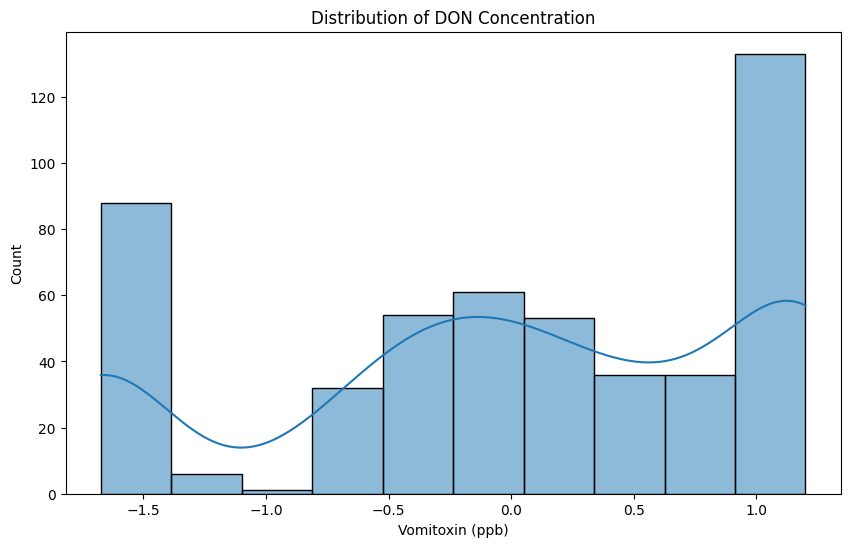

In [ ]:
# Target statistics

# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(data['vomitoxin_ppb_boxcox'], kde=True)
plt.title('Distribution of DON Concentration')
plt.xlabel('Vomitoxin (ppb)')
plt.show()

In [ ]:
print(f"New skewness: {data['vomitoxin_ppb'].skew():.2f}")

New skewness: 0.59


We'll build a regression model to predict the DON concentration (ppb) and then classify the result into three categories: Good, Neutral, and Bad, where 2000 ppb is considered dangerous for humans.

In [ ]:
from sklearn.preprocessing import power_transform


#epsilon = 1e-6  # A small positive constant (you can adjust this value if needed)
# Reshape 'vomitoxin_ppb' and apply Box-Cox
vomitoxin_ppb_values = data['vomitoxin_ppb'].values.reshape(-1, 1)# + epsilon
vomitoxin_ppb_boxcox = power_transform(vomitoxin_ppb_values, method='yeo-johnson')

# 2. Flatten and add the Box-Cox transformed values to the DataFrame
data['vomitoxin_ppb_boxcox'] = vomitoxin_ppb_boxcox.flatten()

# 3. Calculate skewness of Box-Cox transformed target variable
skewness_boxcox = data['vomitoxin_ppb_boxcox'].skew()
print(f"Skewness of Box-Cox transformed vomitoxin_ppb: {skewness_boxcox:.2f}")

Skewness of Box-Cox transformed vomitoxin_ppb: -0.40


# **PCA**

In [6]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split data into features (X) and target (y)
X = data.drop(['hsi_id', 'vomitoxin_ppb'], axis=1)
y = data['vomitoxin_ppb']

# Split into train/test sets FIRST
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize using training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use same scaler

fit_transform :  Learns the scaling parameters (mean, std) from training data and then applies them.

transform : Uses the same learned scaling parameters on test data without refitting—ensuring consistency.


breaking the **data leakage problem**

In [ ]:
# Fit PCA on training data
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)  # Apply PCA to test data

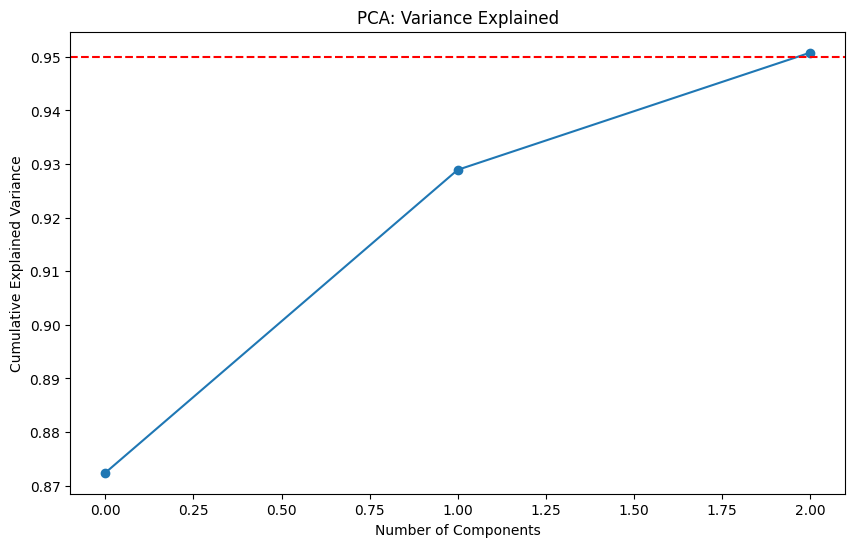

Number of PCA components: 3


In [62]:
# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(0.95, color='red', linestyle='--')
plt.title('PCA: Variance Explained')
plt.show()

print(f"Number of PCA components: {pca.n_components_}")

This graph helps us understand how much of the original data’s information we can keep if we simplify it using PCA

PCA is like a supercompression tool,Our spectral data has hundreds of measurements per corn sample.PCA helps us create a smaller number of ‘super-measurements’ (principal components) that still capture most of the useful information.

The line shows how much total information (variance) we retain as we add more components.

The steep part of the curve means the first few components capture the most valuable patterns in the data.

The red dashed line at 95% is a common threshold—we want to keep at least 95% of the useful information while reducing complexity.

It's possible that some important information for predicting vomitoxin levels is in that small 5% of information we're throwing away. We'll need to test our models to make sure we're not losing anything crucial by simplifying this much.

This graph shows that just 3 components capture over 95% of the original information, meaning we don’t need all the original measurements.



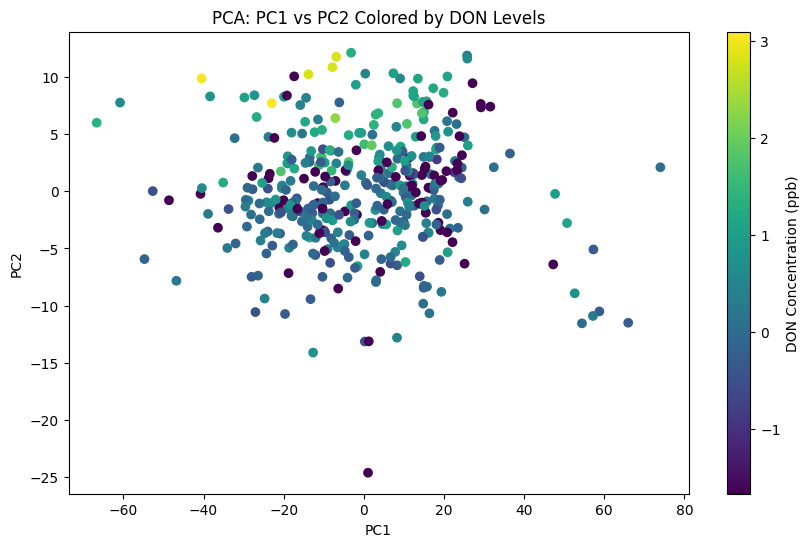

In [63]:
# 2D Plot (First 2 components)
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.colorbar(label='DON Concentration (ppb)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: PC1 vs PC2 Colored by DON Levels')
plt.show()

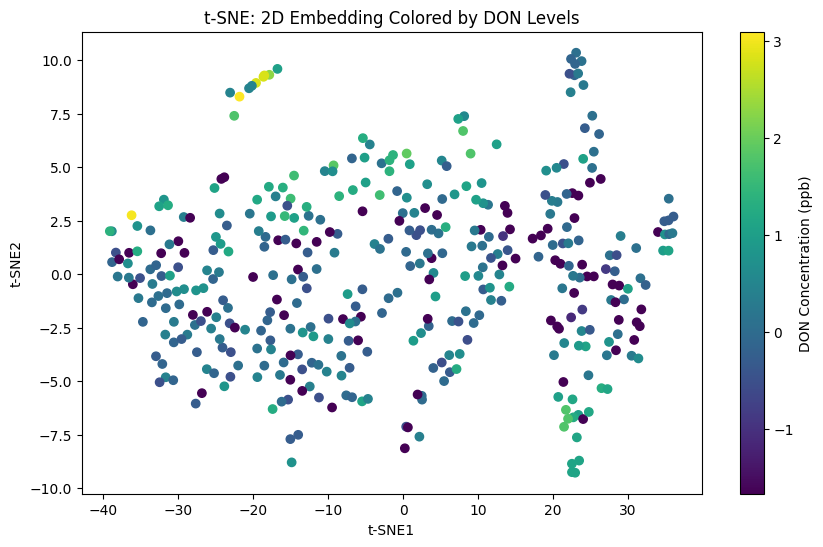

In [64]:
from sklearn.manifold import TSNE

# Subsampling for t-SNE (optional for large datasets)
sample_size = 1000  # Adjust based on your data size
X_sample = X_train_scaled[:sample_size]
y_sample = y_train[:sample_size]

# Fit t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_sample)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample, cmap='viridis')
plt.colorbar(label='DON Concentration (ppb)')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('t-SNE: 2D Embedding Colored by DON Levels')
plt.show()

High DON Samples Are Not Forming a Single, Tight Cluster

 we don't see really clear, separate groups or clusters of points.

 Unlike PCA, t-SNE is designed to reveal non-linear patterns and clusters. But even with t-SNE, which is more powerful for visualization, we still don't see clear visual separation of corn samples based on their DON levels.

 we want to check whether it is the problem of dataset or measurement(sensor) problem

Also it indicates that our data is non linear,so we should use **XGBoost**

We are predicting regression not classification, Even if samples don't fall into neat clusters, there might still be a continuous, albeit noisy, relationship that a regression model can learn.

In [65]:
# Variance explained by top components
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Report top 5 components
print("Variance explained by top 5 components:")
for i, (var, cum_var) in enumerate(zip(explained_variance[:5], cumulative_variance[:5])):
    print(f"PC{i+1}: {var*100:.1f}% (Cumulative: {cum_var*100:.1f}%)")

# Total variance explained by all retained components
print(f"\nTotal variance explained by {pca.n_components_} components: {cumulative_variance[-1]*100:.1f}%")

Variance explained by top 5 components:
PC1: 87.2% (Cumulative: 87.2%)
PC2: 5.7% (Cumulative: 92.9%)
PC3: 2.2% (Cumulative: 95.1%)

Total variance explained by 3 components: 95.1%


The fact that Principal Component 1 (PC1) alone explains a massive 87.2% of the variance is a very strong signal. This means that the single most important pattern in our complex hyperspectral data captures a huge chunk of the overall variation across all our corn samples.

It seems like a good model based on the scores

# Box cox

In [28]:
data = pd.read_csv("/content/TASK-ML-INTERN.csv")

In [43]:
from sklearn.preprocessing import power_transform


# 1. Handle zero values by adding a small constant BEFORE Box-Cox
epsilon = 1e-6  # A small positive constant (you can adjust this value if needed)
vomitoxin_ppb_values = data['vomitoxin_ppb'].values.reshape(-1, 1)
vomitoxin_ppb_values_positive = vomitoxin_ppb_values + epsilon  # Add epsilon to make data strictly positive

# **DEBUGGING PRINT STATEMENT:** Check the minimum value after adding epsilon
print(f"Minimum value after adding epsilon: {np.min(vomitoxin_ppb_values_positive)}")


# 2. Apply Box-Cox transformation using power_transform
vomitoxin_ppb_boxcox = power_transform(vomitoxin_ppb_values_positive, method='box-cox') # Apply to positive data

# 3. Flatten and add the Box-Cox transformed values to the DataFrame
data['vomitoxin_ppb'] = vomitoxin_ppb_boxcox.flatten()

# 4. Calculate skewness of Box-Cox transformed target variable
skewness_boxcox = data['vomitoxin_ppb'].skew()
print(f"Skewness of Box-Cox transformed vomitoxin_ppb: {skewness_boxcox:.2f}")

Minimum value after adding epsilon: -1.6590120543423492


ValueError: The Box-Cox transformation can only be applied to strictly positive data

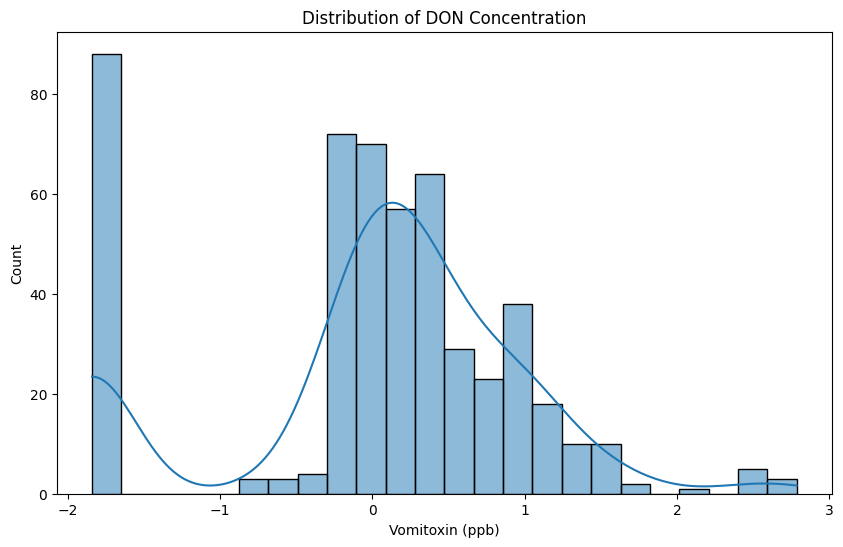

In [30]:
# Target statistics

# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(data['vomitoxin_ppb'], kde=True)
plt.title('Distribution of DON Concentration')
plt.xlabel('Vomitoxin (ppb)')
plt.show()

In [31]:
# Split data into features (X) and target (y)
X = data.drop(['hsi_id', 'vomitoxin_ppb'], axis=1)
y = data['vomitoxin_ppb']

# Split into train/test sets FIRST
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize using training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use same scaler


# Fit PCA on training data
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)  # Apply PCA to test data




In [32]:
import xgboost as xgb
# Initialize and Train XGBoost Regressor Model
model = xgb.XGBRegressor(
    objective='reg:squarederror', # Regression objective for continuous target
    n_estimators=200,           # Number of boosting rounds (trees)
    max_depth=5,                # Maximum depth of each tree
    learning_rate=0.1,          # Step size shrinkage to prevent overfitting
    random_state=42,            # For reproducibility
    n_jobs=-1                   # Use all available CPU cores for parallel processing
)


model.fit(X_train_pca, y_train) # Train the XGBoost model on PCA-transformed training data

y_pred = model.predict(X_test_pca) # Predict using the PCA-transformed test data

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
# Calculate MSE and then take the square root for RMSE if 'squared' is not available
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
rmse = np.sqrt(mse)  # Calculate RMSE manually
r2 = r2_score(y_test, y_pred)


# Print the results in a formatted way
print("Regression Metrics:")
print(f"  Mean Absolute Error (MAE):  {mae:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"  R² Score:                   {r2:.2f}")

Regression Metrics:
  Mean Absolute Error (MAE):  0.67
  Root Mean Squared Error (RMSE): 0.95
  R² Score:                   0.06


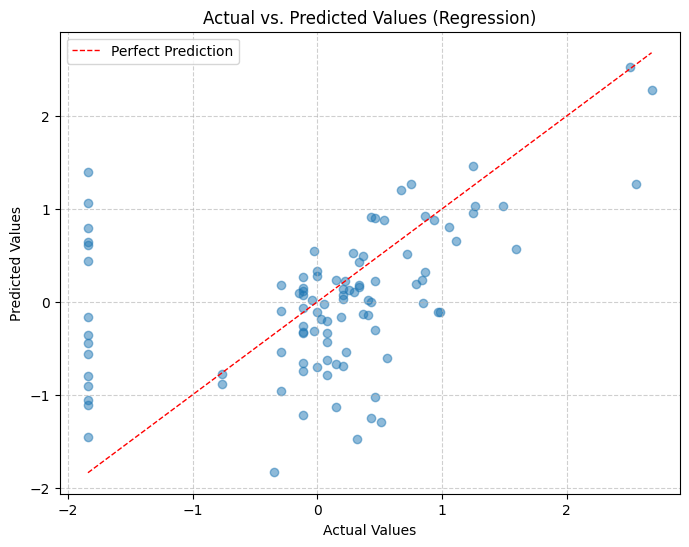

In [34]:
import matplotlib.pyplot as plt
import numpy as np # Assuming you are using numpy

# Assuming you have already calculated:
# - y_test: The true target values for your test set
# - y_pred: The predicted target values from your regression model

# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(y_test, y_pred, alpha=0.5)  # alpha for transparency if there are many points

# Add a diagonal line for perfect predictions (y=x)
min_val = min(y_test.min(), y_pred.min()) # Find min value to scale line from
max_val = max(y_test.max(), y_pred.max()) # Find max value to scale line to
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1, label='Perfect Prediction') # plot line

# Labeling and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Regression)")
plt.grid(True, linestyle='--', alpha=0.6) # Add a grid for better readability
plt.legend() # Show label for the diagonal line

# Show the plot
plt.show()

# **Outlier Removal**

In [28]:
data = pd.read_csv("/content/TASK-ML-INTERN.csv")

In [29]:
import pandas as pd

# Calculate IQR bounds
Q1 = data['vomitoxin_ppb'].quantile(0.25)
Q3 = data['vomitoxin_ppb'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Remove rows with DON values exceeding the upper bound
data = data[data['vomitoxin_ppb'] <= upper_bound]

# Verify
print(f"Cleaned shape: {data.shape}") #80 extreme values removed

Cleaned shape: (420, 450)


In [30]:
print(f"New skewness: {data['vomitoxin_ppb'].skew():.2f}")

New skewness: 1.98


In [31]:
# Split data into features (X) and target (y)
X = data.drop(['hsi_id', 'vomitoxin_ppb'], axis=1)
y = data['vomitoxin_ppb']

# Split into train/test sets FIRST
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize using training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use same scaler


# Fit PCA on training data
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)  # Apply PCA to test data




In [32]:
import xgboost as xgb
# Initialize and Train XGBoost Regressor Model
model = xgb.XGBRegressor(
    objective='reg:squarederror', # Regression objective for continuous target
    n_estimators=200,           # Number of boosting rounds (trees)
    max_depth=5,                # Maximum depth of each tree
    learning_rate=0.1,          # Step size shrinkage to prevent overfitting
    random_state=42,            # For reproducibility
    n_jobs=-1                   # Use all available CPU cores for parallel processing
)


model.fit(X_train_pca, y_train) # Train the XGBoost model on PCA-transformed training data

y_pred = model.predict(X_test_pca) # Predict using the PCA-transformed test data

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
# Calculate MSE and then take the square root for RMSE if 'squared' is not available
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
rmse = np.sqrt(mse)  # Calculate RMSE manually
r2 = r2_score(y_test, y_pred)


# Print the results in a formatted way
print("Regression Metrics:")
print(f"  Mean Absolute Error (MAE):  {mae:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"  R² Score:                   {r2:.2f}")

Regression Metrics:
  Mean Absolute Error (MAE):  564.54
  Root Mean Squared Error (RMSE): 750.92
  R² Score:                   -0.03


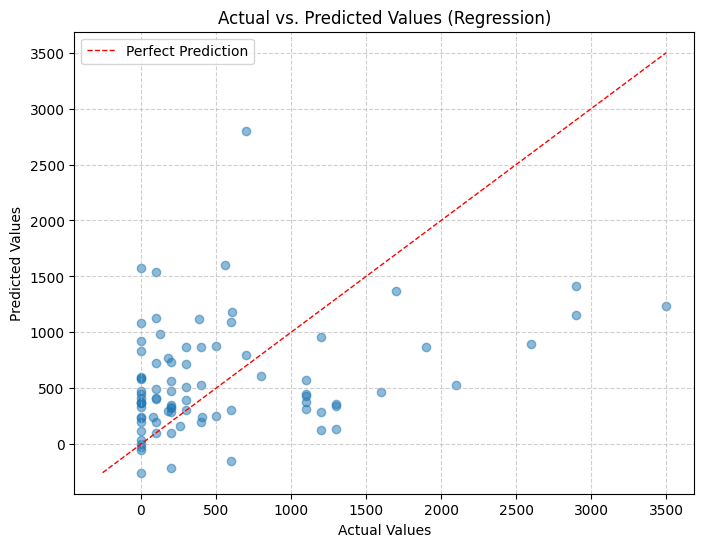

In [34]:
import matplotlib.pyplot as plt
import numpy as np # Assuming you are using numpy

# Assuming you have already calculated:
# - y_test: The true target values for your test set
# - y_pred: The predicted target values from your regression model

# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(y_test, y_pred, alpha=0.5)  # alpha for transparency if there are many points

# Add a diagonal line for perfect predictions (y=x)
min_val = min(y_test.min(), y_pred.min()) # Find min value to scale line from
max_val = max(y_test.max(), y_pred.max()) # Find max value to scale line to
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1, label='Perfect Prediction') # plot line

# Labeling and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Regression)")
plt.grid(True, linestyle='--', alpha=0.6) # Add a grid for better readability
plt.legend() # Show label for the diagonal line

# Show the plot
plt.show()

# **outlier removal + normalization**

In [35]:
data = pd.read_csv("/content/TASK-ML-INTERN.csv")

In [36]:
import pandas as pd

# Calculate IQR bounds
Q1 = data['vomitoxin_ppb'].quantile(0.25)
Q3 = data['vomitoxin_ppb'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Remove rows with DON values exceeding the upper bound
data = data[data['vomitoxin_ppb'] <= upper_bound]

# Verify
print(f"Cleaned shape: {data.shape}") #80 extreme values removed

Cleaned shape: (420, 450)


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['vomitoxin_ppb'] = scaler.fit_transform(data[['vomitoxin_ppb']])

# Verify the transformation
print(f"Mean after scaling: {data['vomitoxin_ppb'].mean():.4f}")
print(f"Standard deviation after scaling: {data['vomitoxin_ppb'].std():.4f}")


Mean after scaling: -0.0000
Standard deviation after scaling: 1.0012


In [38]:
print(f"New skewness: {data['vomitoxin_ppb'].skew():.2f}")

New skewness: 1.98


In [39]:
# Split data into features (X) and target (y)
X = data.drop(['hsi_id', 'vomitoxin_ppb'], axis=1)
y = data['vomitoxin_ppb']

# Split into train/test sets FIRST
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize using training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use same scaler


# Fit PCA on training data
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)  # Apply PCA to test data


In [40]:
import xgboost as xgb
# Initialize and Train XGBoost Regressor Model
model = xgb.XGBRegressor(
    objective='reg:squarederror', # Regression objective for continuous target
    n_estimators=200,           # Number of boosting rounds (trees)
    max_depth=5,                # Maximum depth of each tree
    learning_rate=0.1,          # Step size shrinkage to prevent overfitting
    random_state=42,            # For reproducibility
    n_jobs=-1                   # Use all available CPU cores for parallel processing
)


model.fit(X_train_pca, y_train) # Train the XGBoost model on PCA-transformed training data

y_pred = model.predict(X_test_pca) # Predict using the PCA-transformed test data

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
# Calculate MSE and then take the square root for RMSE if 'squared' is not available
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
rmse = np.sqrt(mse)  # Calculate RMSE manually
r2 = r2_score(y_test, y_pred)


# Print the results in a formatted way
print("Regression Metrics:")
print(f"  Mean Absolute Error (MAE):  {mae:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"  R² Score:                   {r2:.2f}")

Regression Metrics:
  Mean Absolute Error (MAE):  0.66
  Root Mean Squared Error (RMSE): 0.88
  R² Score:                   -0.03


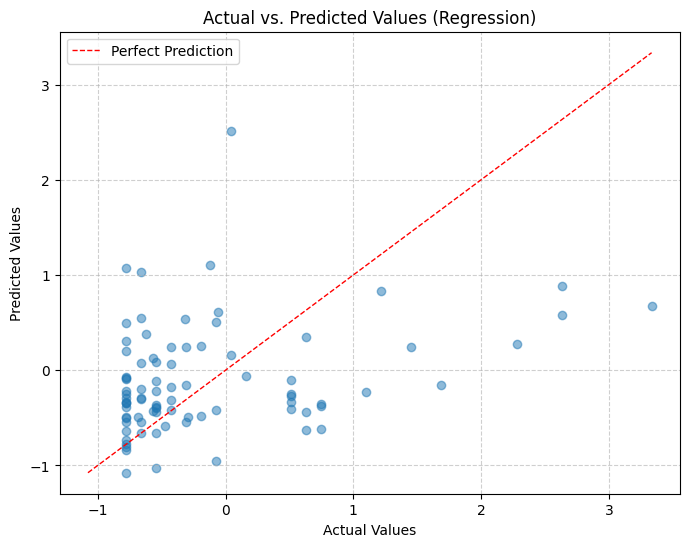

In [25]:
import matplotlib.pyplot as plt
import numpy as np # Assuming you are using numpy

# Assuming you have already calculated:
# - y_test: The true target values for your test set
# - y_pred: The predicted target values from your regression model

# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(y_test, y_pred, alpha=0.5)  # alpha for transparency if there are many points

# Add a diagonal line for perfect predictions (y=x)
min_val = min(y_test.min(), y_pred.min()) # Find min value to scale line from
max_val = max(y_test.max(), y_pred.max()) # Find max value to scale line to
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1, label='Perfect Prediction') # plot line

# Labeling and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Regression)")
plt.grid(True, linestyle='--', alpha=0.6) # Add a grid for better readability
plt.legend() # Show label for the diagonal line

# Show the plot
plt.show()

# **Yelo johnson**

In [4]:
data = pd.read_csv("/content/TASK-ML-INTERN.csv")

In [5]:
from sklearn.preprocessing import power_transform


# Reshape 'vomitoxin_ppb' and apply Box-Cox
vomitoxin_ppb_values = data['vomitoxin_ppb'].values.reshape(-1, 1)
vomitoxin_ppb = power_transform(vomitoxin_ppb_values, method='yeo-johnson')

data['vomitoxin_ppb'] = vomitoxin_ppb.flatten()

skewness_boxcox = data['vomitoxin_ppb'].skew()
print(f"Skewness of Box-Cox transformed vomitoxin_ppb: {skewness_boxcox:.2f}")

Skewness of Box-Cox transformed vomitoxin_ppb: -0.03


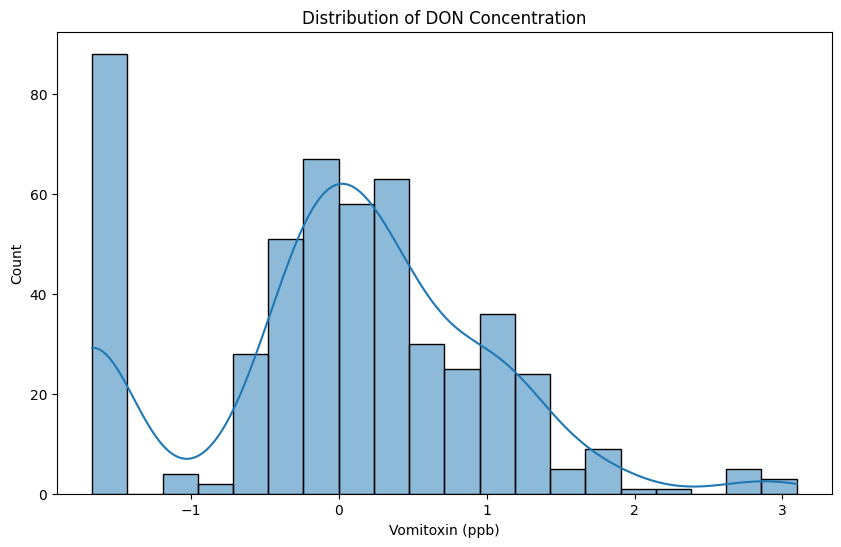

In [6]:
# Target statistics

# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(data['vomitoxin_ppb'], kde=True)
plt.title('Distribution of DON Concentration')
plt.xlabel('Vomitoxin (ppb)')
plt.show()

After applying yeo-johnson it looks similar like normal distribution

The Yeo-Johnson transformation has achieved a remarkable reduction in skewness, bringing it from a highly skewed distribution to a nearly symmetrical one.

In [8]:
# Split data into features (X) and target (y)
X = data.drop(['hsi_id', 'vomitoxin_ppb'], axis=1)
y = data['vomitoxin_ppb']
from sklearn.model_selection import train_test_split # This line needs to be added

# Split into train/test sets FIRST
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize using training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use same scaler


# Fit PCA on training data
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)  # Apply PCA to test data


In [9]:
import xgboost as xgb
# Initialize and Train XGBoost Regressor Model
model = xgb.XGBRegressor(
    objective='reg:squarederror', # Regression objective for continuous target
    n_estimators=200,           # Number of boosting rounds (trees)
    max_depth=5,                # Maximum depth of each tree
    learning_rate=0.1,          # Step size shrinkage to prevent overfitting
    random_state=42,            # For reproducibility
    n_jobs=-1                   # Use all available CPU cores for parallel processing
)


model.fit(X_train_pca, y_train) # Train the XGBoost model on PCA-transformed training data

y_pred = model.predict(X_test_pca) # Predict using the PCA-transformed test data

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
# Calculate MSE and then take the square root for RMSE if 'squared' is not available
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
rmse = np.sqrt(mse)  # Calculate RMSE manually
r2 = r2_score(y_test, y_pred)


# Print the results in a formatted way
print("Regression Metrics:")
print(f"  Mean Absolute Error (MAE):  {mae:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"  R² Score:                   {r2:.2f}")

Regression Metrics:
  Mean Absolute Error (MAE):  0.62
  Root Mean Squared Error (RMSE): 0.88
  R² Score:                   0.21


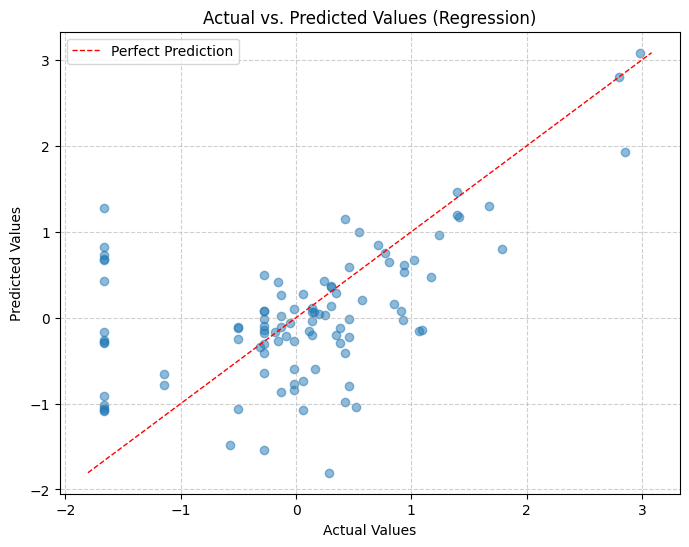

In [11]:
import matplotlib.pyplot as plt
import numpy as np # Assuming you are using numpy

# Assuming you have already calculated:
# - y_test: The true target values for your test set
# - y_pred: The predicted target values from your regression model

# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(y_test, y_pred, alpha=0.5)  # alpha for transparency if there are many points

# Add a diagonal line for perfect predictions (y=x)
min_val = min(y_test.min(), y_pred.min()) # Find min value to scale line from
max_val = max(y_test.max(), y_pred.max()) # Find max value to scale line to
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1, label='Perfect Prediction') # plot line

# Labeling and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Regression)")
plt.grid(True, linestyle='--', alpha=0.6) # Add a grid for better readability
plt.legend() # Show label for the diagonal line

# Show the plot
plt.show()

# **Without any data transformation**

In [42]:
data = pd.read_csv("/content/TASK-ML-INTERN.csv")

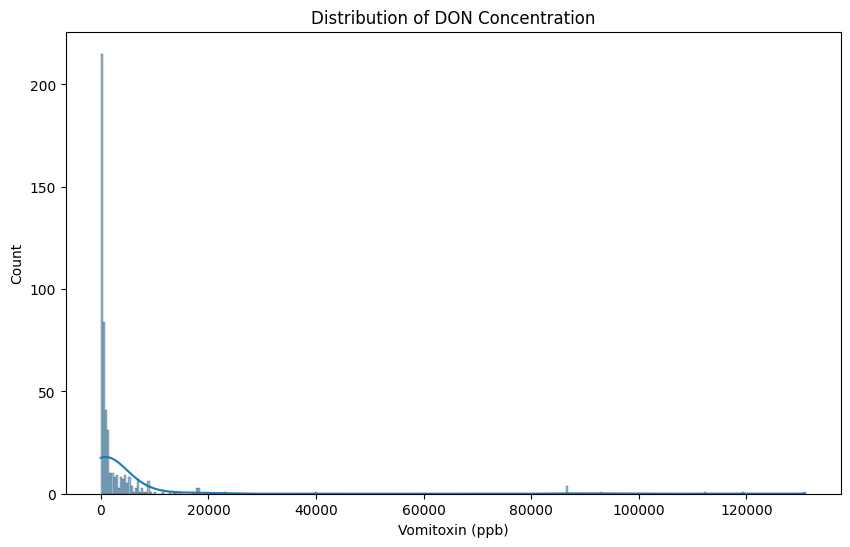

In [43]:
# Target statistics

# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(data['vomitoxin_ppb'], kde=True)
plt.title('Distribution of DON Concentration')
plt.xlabel('Vomitoxin (ppb)')
plt.show()

In [44]:
# Split data into features (X) and target (y)
X = data.drop(['hsi_id', 'vomitoxin_ppb'], axis=1)
y = data['vomitoxin_ppb']

# Split into train/test sets FIRST
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize using training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use same scaler


# Fit PCA on training data
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)  # Apply PCA to test data


In [45]:
import xgboost as xgb
# Initialize and Train XGBoost Regressor Model
model = xgb.XGBRegressor(
    objective='reg:squarederror', # Regression objective for continuous target
    n_estimators=200,           # Number of boosting rounds (trees)
    max_depth=5,                # Maximum depth of each tree
    learning_rate=0.1,          # Step size shrinkage to prevent overfitting
    random_state=42,            # For reproducibility
    n_jobs=-1                   # Use all available CPU cores for parallel processing
)


model.fit(X_train_pca, y_train) # Train the XGBoost model on PCA-transformed training data

y_pred = model.predict(X_test_pca) # Predict using the PCA-transformed test data

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
# Calculate MSE and then take the square root for RMSE if 'squared' is not available
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
rmse = np.sqrt(mse)  # Calculate RMSE manually
r2 = r2_score(y_test, y_pred)


# Print the results in a formatted way
print("Regression Metrics:")
print(f"  Mean Absolute Error (MAE):  {mae:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"  R² Score:                   {r2:.2f}")

Regression Metrics:
  Mean Absolute Error (MAE):  2044.35
  Root Mean Squared Error (RMSE): 4286.77
  R² Score:                   0.93


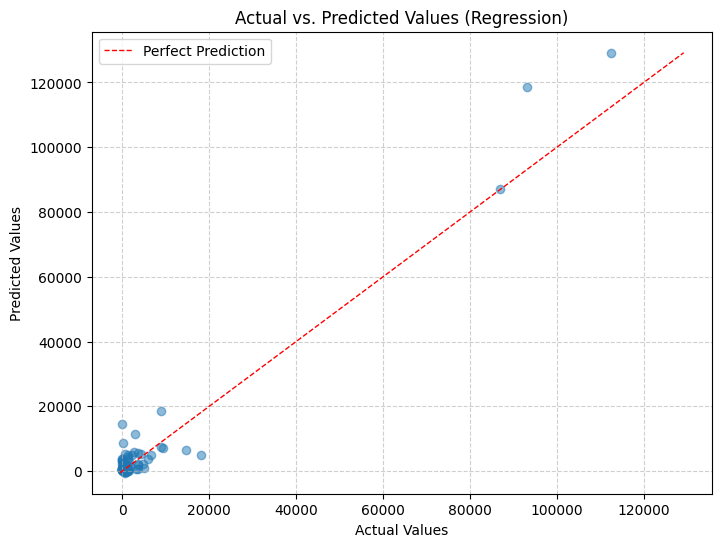

In [47]:
import matplotlib.pyplot as plt
import numpy as np # Assuming you are using numpy

# Assuming you have already calculated:
# - y_test: The true target values for your test set
# - y_pred: The predicted target values from your regression model

# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(y_test, y_pred, alpha=0.5)  # alpha for transparency if there are many points

# Add a diagonal line for perfect predictions (y=x)
min_val = min(y_test.min(), y_pred.min()) # Find min value to scale line from
max_val = max(y_test.max(), y_pred.max()) # Find max value to scale line to
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1, label='Perfect Prediction') # plot line

# Labeling and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Regression)")
plt.grid(True, linestyle='--', alpha=0.6) # Add a grid for better readability
plt.legend() # Show label for the diagonal line

# Show the plot
plt.show()

## **Log transformation**

In [48]:
data = pd.read_csv("/content/TASK-ML-INTERN.csv")

In [49]:
data['vomitoxin_ppb'] = np.log1p(data['vomitoxin_ppb'])

In [50]:
# Split data into features (X) and target (y)
X = data.drop(['hsi_id', 'vomitoxin_ppb'], axis=1)
y = data['vomitoxin_ppb']

# Split into train/test sets FIRST
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize using training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use same scaler


# Fit PCA on training data
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)  # Apply PCA to test data


In [51]:
model.fit(X_train_pca, y_train) # Train the XGBoost model on PCA-transformed training data

y_pred = model.predict(X_test_pca) # Predict using the PCA-transformed test data

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
# Calculate MSE and then take the square root for RMSE if 'squared' is not available
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
rmse = np.sqrt(mse)  # Calculate RMSE manually
r2 = r2_score(y_test, y_pred)


# Print the results in a formatted way
print("Regression Metrics:")
print(f"  Mean Absolute Error (MAE):  {mae:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"  R² Score:                   {r2:.2f}")

Regression Metrics:
  Mean Absolute Error (MAE):  2.09
  Root Mean Squared Error (RMSE): 2.98
  R² Score:                   -0.10


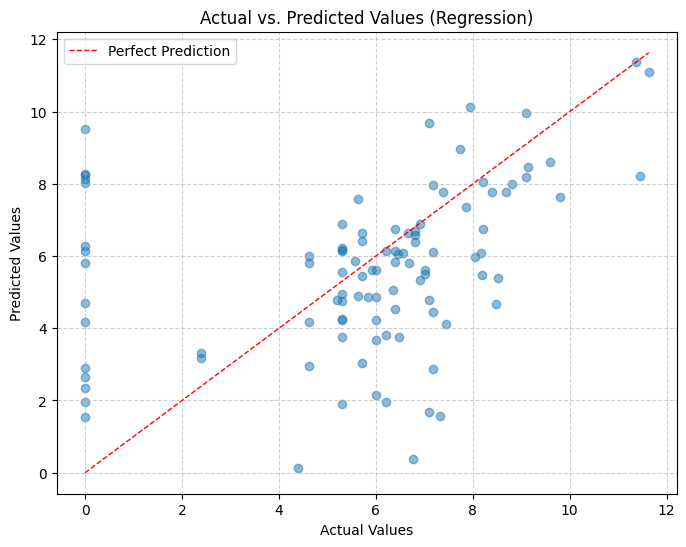

In [53]:
import matplotlib.pyplot as plt
import numpy as np # Assuming you are using numpy

# Assuming you have already calculated:
# - y_test: The true target values for your test set
# - y_pred: The predicted target values from your regression model

# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(y_test, y_pred, alpha=0.5)  # alpha for transparency if there are many points

# Add a diagonal line for perfect predictions (y=x)
min_val = min(y_test.min(), y_pred.min()) # Find min value to scale line from
max_val = max(y_test.max(), y_pred.max()) # Find max value to scale line to
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1, label='Perfect Prediction') # plot line

# Labeling and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Regression)")
plt.grid(True, linestyle='--', alpha=0.6) # Add a grid for better readability
plt.legend() # Show label for the diagonal line

# Show the plot
plt.show()

Since the data is non-linear, relying solely on R² is not ideal for evaluation. When comparing different transformation methods, Yeo-Johnson provides a better model as it achieves a lower MSE and an R² value of 23%, making it more effective than other transformations.

# **Hubber loss**

In [54]:
from sklearn.linear_model import HuberRegressor

huber_model = HuberRegressor(epsilon=1.35)  # 'epsilon' controls robustness - tune if needed
huber_model.fit(X_train_pca, y_train) # Train on PCA-transformed data
y_pred_huber = huber_model.predict(X_test_pca) # Make predictions

# Evaluate Huber Regression (use MAE, RMSE, R² as before)
mae_huber = mean_absolute_error(y_test, y_pred_huber)
rmse_huber = mean_squared_error(y_test, y_pred_huber)
r2_huber = r2_score(y_test, y_pred_huber)

print("Huber Regression Metrics:")
print(f"  Mean Absolute Error (MAE):  {mae_huber:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_huber:.2f}")
print(f"  R² Score:                   {r2_huber:.2f}")

Huber Regression Metrics:
  Mean Absolute Error (MAE):  1.72
  Root Mean Squared Error (RMSE): 7.24
  R² Score:                   0.11


We'll opt for the Yeo-Johnson method as it outperforms other transformations, providing better model performance.

# **Linear regression**

In [12]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_pca, y_train)
y_pred_linear = linear_model.predict(X_test_pca)

In [13]:
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# 5. Print the evaluation metrics for Linear Regression
print("Linear Regression Metrics:")
print(f"  Mean Absolute Error (MAE):  {mae_linear:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_linear:.2f}")
print(f"  R² Score:                   {r2_linear:.2f}")

Linear Regression Metrics:
  Mean Absolute Error (MAE):  0.62
  Root Mean Squared Error (RMSE): 0.66
  R² Score:                   0.33


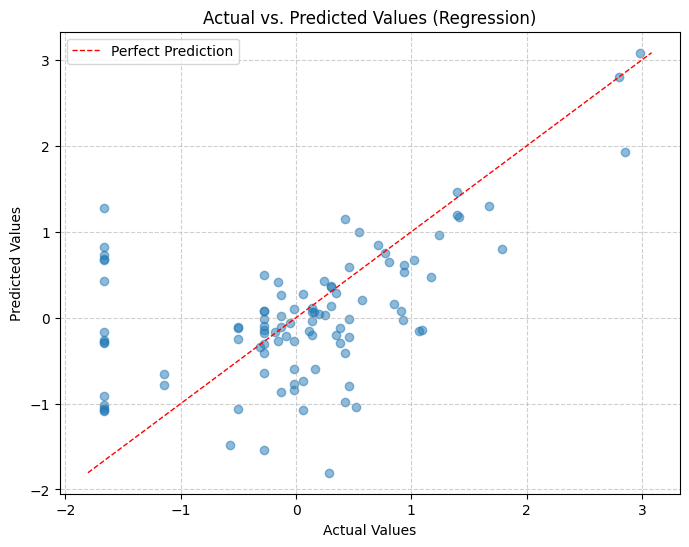

In [14]:
import matplotlib.pyplot as plt
import numpy as np # Assuming you are using numpy

# Assuming you have already calculated:
# - y_test: The true target values for your test set
# - y_pred: The predicted target values from your regression model

# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(y_test, y_pred, alpha=0.5)  # alpha for transparency if there are many points

# Add a diagonal line for perfect predictions (y=x)
min_val = min(y_test.min(), y_pred.min()) # Find min value to scale line from
max_val = max(y_test.max(), y_pred.max()) # Find max value to scale line to
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1, label='Perfect Prediction') # plot line

# Labeling and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Regression)")
plt.grid(True, linestyle='--', alpha=0.6) # Add a grid for better readability
plt.legend() # Show label for the diagonal line

# Show the plot
plt.show()

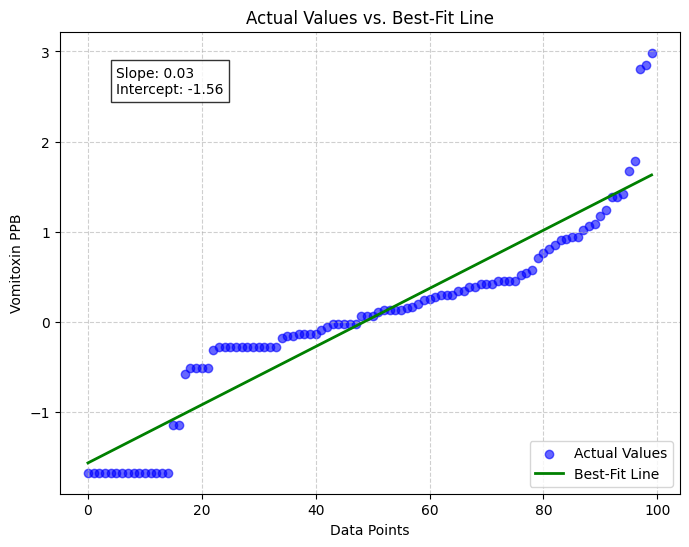

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Sort actual values for a smoother best-fit line
sorted_indices = np.argsort(y_test)
y_test_sorted = np.array(y_test)[sorted_indices]

# Fit a regression line to actual values
coefficients = np.polyfit(range(len(y_test_sorted)), y_test_sorted, 1)
best_fit_line = np.polyval(coefficients, range(len(y_test_sorted)))

# Plot actual values as scatter points
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test_sorted)), y_test_sorted, label="Actual Values", color="blue", alpha=0.6)

# Plot the best-fit regression line
plt.plot(range(len(y_test_sorted)), best_fit_line, color="green", linestyle="-", linewidth=2, label="Best-Fit Line")

# Annotate slope and intercept
slope, intercept = coefficients
plt.text(0.05 * len(y_test_sorted), 0.85 * max(y_test_sorted),
         f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}',
         bbox=dict(facecolor='white', alpha=0.8))

# Labels and title
plt.xlabel("Data Points")
plt.ylabel("Vomitoxin PPB")
plt.title("Actual Values vs. Best-Fit Line")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()


# **Random Forest**

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning


# --- 2. Random Forest Regressor (Basic Training and Evaluation) ---

# Initialize Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1) # Basic RF with random_state for reproducibility

# Train the Random Forest Regressor model
rf_model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_pca)

# Evaluate the Random Forest Regressor model using regression metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics for Random Forest Regressor
print("Random Forest Regressor Metrics (Baseline - No Tuning):")
print(f"  Mean Absolute Error (MAE):  {mae_rf:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"  R² Score:                   {r2_rf:.2f}")

Random Forest Regressor Metrics (Baseline - No Tuning):
  Mean Absolute Error (MAE):  0.64
  Root Mean Squared Error (RMSE): 0.76
  R² Score:                   0.23


In [21]:
# --- 3. Hyperparameter Tuning using GridSearchCV for Random Forest ---

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of trees to try
    'max_depth': [3, 5, 7],              # Maximum depth of trees
    'min_samples_split': [2, 5, 10],     # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]        # Minimum samples per leaf
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42, n_jobs=-1), # Base model (untuned RF)
                           param_grid=param_grid,       # Hyperparameter grid
                           cv=3,                          # 3-fold cross-validation
                           scoring='neg_mean_squared_error', # Metric to optimize (negative MSE for GridSearchCV)
                           n_jobs=-1,                     # Use all cores for parallel processing
                           verbose=1)                      # Show progress messages (optional)

# Run GridSearchCV (this will take some time)
grid_search.fit(X_train_pca, y_train)

# --- 4. Analyze and Report Results of Hyperparameter Tuning ---

# Best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Best hyperparameters found
best_params = grid_search.best_params_
print("\nBest Hyperparameters from GridSearchCV:")
print(best_params)

# Evaluate the best model on the test set
y_pred_best_rf = best_rf_model.predict(X_test_pca)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
rmse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

# Print evaluation metrics for the best Random Forest model
print("\nRandom Forest Regressor Metrics (Best Model from GridSearchCV):")
print(f"  Mean Absolute Error (MAE):  {mae_best_rf:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_best_rf:.2f}")
print(f"  R² Score:                   {r2_best_rf:.2f}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits

Best Hyperparameters from GridSearchCV:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Random Forest Regressor Metrics (Best Model from GridSearchCV):
  Mean Absolute Error (MAE):  0.64
  Root Mean Squared Error (RMSE): 0.73
  R² Score:                   0.27


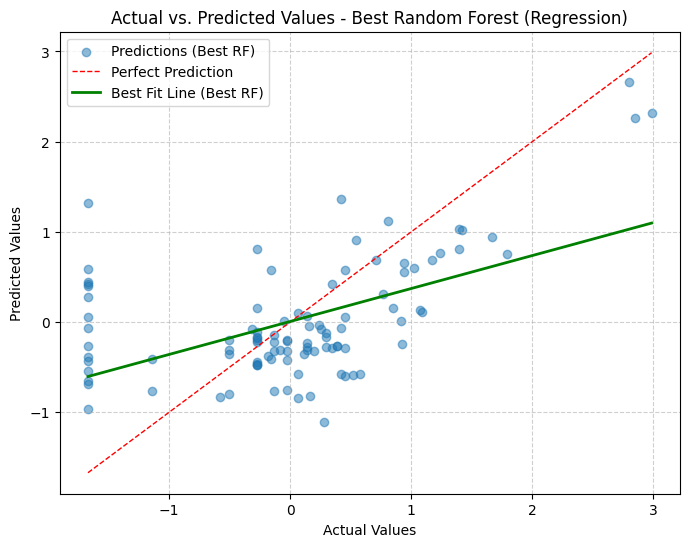

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib for plotting


# --- 4. Scatter plot of Actual vs. Predicted Values for Best Random Forest Model ---

# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(y_test, y_pred_best_rf, alpha=0.5, label='Predictions (Best RF)')  # Use y_pred_best_rf and label it

# Add a diagonal line for perfect predictions (y=x)
min_val = min(y_test.min(), y_pred_best_rf.min()) # Adjust min/max to include best RF predictions
max_val = max(y_test.max(), y_pred_best_rf.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1, label='Perfect Prediction') # plot line

# --- Add Best Fit Line (Optional, but informative) ---
# 1. Reshape data for Linear Regression (sklearn expects 2D arrays)
actual_values_reshaped = y_test.values.reshape(-1, 1) #Use actual values as X
predicted_values_reshaped = y_pred_best_rf.reshape(-1, 1) #Use PREDICTED values from BEST RF model

# 2. Perform Linear Regression to find the best fit line
best_fit_model_rf = LinearRegression() # Separate Linear Regression model for RF plot
best_fit_model_rf.fit(actual_values_reshaped, predicted_values_reshaped)

# 3. Generate points for the best fit line
x_range = np.linspace(min_val, max_val, 100)  # X-values for the line (range of actual values)
y_best_fit_rf = best_fit_model_rf.predict(x_range.reshape(-1, 1)) # Calculate corresponding y-values using the model

# 4. Plot the Best Fit Line (Green)
plt.plot(x_range, y_best_fit_rf, color='green', linewidth=2, label='Best Fit Line (Best RF)') # Plot the line - Label updated

# Labeling and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values - Best Random Forest (Regression)") # Updated title
plt.grid(True, linestyle='--', alpha=0.6) # Add a grid for better readability
plt.legend() # Show legend for all lines and scatter

# Show the plot
plt.show()

# **XG Boost**

In [23]:
# --- 2. XGBoost Regressor (Basic Training and Evaluation) ---

# Initialize XGBoost Regressor model
xgbr = xgb.XGBRegressor(
    objective='reg:squarederror', # Regression objective for continuous target
    n_estimators=200,           # Number of boosting rounds (trees)
    max_depth=5,                # Maximum depth of each tree
    learning_rate=0.1,          # Step size shrinkage to prevent overfitting
    random_state=42,            # For reproducibility
    n_jobs=-1                   # Use all available CPU cores for parallel processing
)

# Train the XGBoost Regressor model
xgbr.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_xgb = xgbr.predict(X_test_pca)

# Evaluate the XGBoost Regressor model using regression metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the evaluation metrics for XGBoost Regressor
print("XGBoost Regressor Metrics (Baseline - No Tuning):")
print(f"  Mean Absolute Error (MAE):  {mae_xgb:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"  R² Score:                   {r2_xgb:.2f}")

XGBoost Regressor Metrics (Baseline - No Tuning):
  Mean Absolute Error (MAE):  0.62
  Root Mean Squared Error (RMSE): 0.78
  R² Score:                   0.21


In [24]:
# --- 2. Hyperparameter Tuning using GridSearchCV for XGBoost ---

# Define the hyperparameter grid to search
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400],      # Number of boosting rounds
    'max_depth': [3, 4, 5, 6],               # Maximum depth of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate (step size shrinkage)
    'subsample': [0.7, 0.8, 0.9, 1.0],        # Subsample ratio of training instance
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]  # Subsample ratio of columns when constructing each tree
}

# Initialize GridSearchCV for XGBoost Regressor
grid_search_xgb = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1), # Base XGBoost model
                               param_grid=param_grid_xgb,       # Hyperparameter grid
                               cv=3,                          # 3-fold cross-validation
                               scoring='neg_mean_squared_error', # Metric to optimize (negative MSE)
                               n_jobs=-1,                     # Use all cores for parallel processing
                               verbose=1)                      # Show progress messages (optional)

# Run GridSearchCV for XGBoost (this will take some time)
grid_search_xgb.fit(X_train_pca, y_train)

# --- 3. Analyze and Report Results of Hyperparameter Tuning for XGBoost ---

# Best model from GridSearchCV
best_xgbr_model = grid_search_xgb.best_estimator_

# Best hyperparameters found
best_params_xgb = grid_search_xgb.best_params_
print("\nBest Hyperparameters from GridSearchCV (XGBoost):")
print(best_params_xgb)

# Evaluate the best model on the test set
y_pred_best_xgb = best_xgbr_model.predict(X_test_pca)
mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
rmse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

# Print evaluation metrics for the best XGBoost model
print("\nXGBoost Regressor Metrics (Best Model from GridSearchCV):")
print(f"  Mean Absolute Error (MAE):  {mae_best_xgb:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_best_xgb:.2f}")
print(f"  R² Score:                   {r2_best_xgb:.2f}")

Fitting 3 folds for each of 1024 candidates, totalling 3072 fits

Best Hyperparameters from GridSearchCV (XGBoost):
{'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.7}

XGBoost Regressor Metrics (Best Model from GridSearchCV):
  Mean Absolute Error (MAE):  0.63
  Root Mean Squared Error (RMSE): 0.71
  R² Score:                   0.28


Among the three basic machine learning models, Linear Regression delivers the best performance.

# **Attention Model**

In [25]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Dense, Input, Multiply
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K

# --- 1. Fixed Band-Wise Attention Layer ---
class BandWiseAttention(Layer):
    def __init__(self, **kwargs):
        super(BandWiseAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        # Create a weight for each feature/band
        self.attention_weights = self.add_weight(
            name='attention_weights',
            shape=(input_shape[-1],),  # Shape: (num_features,)
            initializer='random_normal',
            trainable=True
        )
        super(BandWiseAttention, self).build(input_shape)

    def call(self, inputs):
        # Reshape weights to (1, num_features) for broadcasting
        reshaped_weights = K.expand_dims(self.attention_weights, axis=0)  # Shape: (1, num_features)

        # Multiply inputs (batch_size, num_features) by weights (1, num_features)
        return inputs * reshaped_weights  # Broadcasting to (batch_size, num_features)

    def compute_output_shape(self, input_shape):
        return input_shape

# --- 2. Model Building Function ---
def build_attention_nn_model(input_shape):
    inputs = Input(shape=input_shape)

    # Apply attention layer
    x = BandWiseAttention()(inputs)  # Shape: (batch_size, num_features)

    # Add hidden layers
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1, activation='linear')(x)  # Regression output

    model = Model(inputs=inputs, outputs=outputs)
    return model

# --- 3. Example Usage ---
if __name__ == "__main__":
    # Sample data (replace with your PCA-transformed data)
    X_train_pca = tf.random.normal((1000, 3))  # 1000 samples, 3 features
    y_train = tf.random.normal((1000, 1))      # Dummy target values

    # Build and compile model
    model = build_attention_nn_model(input_shape=(3,))
    model.compile(optimizer='adam', loss='mse')

    # Train the model (no shape errors now!)
    history = model.fit(
        X_train_pca, y_train,
        validation_split=0.2,
        epochs=50,
        batch_size=32,
        verbose=1
    )

    # View learned attention weights
    print("\nLearned attention weights:")
    print(model.layers[1].get_weights()[0])  # BandWiseAttention layer is index 1

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 1.0157 - val_loss: 1.0371
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.1140 - val_loss: 1.0364
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0245 - val_loss: 1.0352
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.9989 - val_loss: 1.0340
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9923 - val_loss: 1.0339
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9647 - val_loss: 1.0346
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9417 - val_loss: 1.0359
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9281 - val_loss: 1.0368
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0592 - val_loss: 1.0359
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9614 - val_loss: 1.0382
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0387 - val_loss: 1.0378
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0281 

# **MLFlow**

In [114]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.4/28.4 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.5/677.5 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.2 MB/s eta 0:00:00
